In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
df = pd.read_csv('DAX.csv')

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-03,27.980000,28.111000,27.969999,27.990000,27.320190,2700
1,2020-01-06,27.799999,28.004999,27.799999,28.004999,27.334829,600
2,2020-01-07,28.040001,28.066000,27.955000,27.955000,27.286026,600
3,2020-01-08,28.155001,28.260000,28.155001,28.260000,27.583729,1700
4,2020-01-09,28.430000,28.510000,28.360001,28.450001,27.769180,5700


In [9]:
df = df.filter(["Close"])

In [10]:
df

,Close
0,27.990000
1,28.004999
2,27.955000
3,28.260000
4,28.450001
...,...
312,32.549999
313,32.929001
314,33.639999
315,33.389999


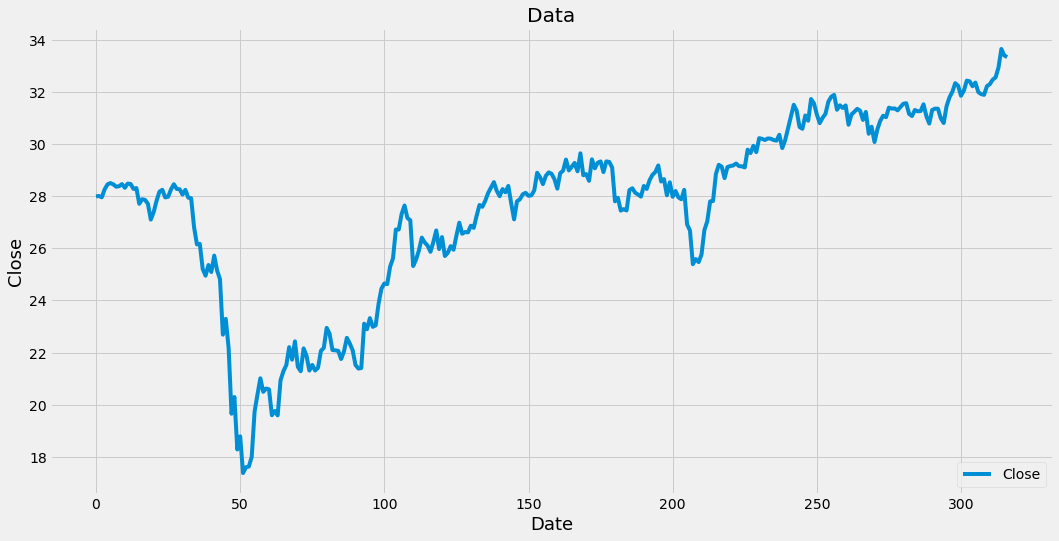

In [11]:
plt.figure(figsize=(16,8))
plt.title('Data')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close',fontsize=18)
plt.plot(df['Close'])
plt.legend(['Close'],loc='lower right')
plt.show()

In [349]:
dataset = df.values

In [350]:
training_data_len = math.ceil(len(dataset) * .8 )
training_data_len

254

In [351]:
scaler = StandardScaler()

In [352]:
scaled_data = scaler.fit_transform(dataset)

In [353]:
scaled_data

array([[ 0.10859674],
       [ 0.11288876],
       [ 0.09858136],
       [ 0.18585827],
       [ 0.24022778],
       [ 0.25453519],
       [ 0.24022778],
       [ 0.21447394],
       [ 0.22019645],
       [ 0.24308875],
       [ 0.2030275 ],
       [ 0.24881211],
       [ 0.24451981],
       [ 0.19015058],
       [ 0.20016568],
       [ 0.02732877],
       [ 0.07711954],
       [ 0.06996598],
       [ 0.02704291],
       [-0.14608015],
       [-0.06452632],
       [ 0.05995059],
       [ 0.16010443],
       [ 0.18070779],
       [ 0.09715088],
       [ 0.10430444],
       [ 0.18442722],
       [ 0.24165827],
       [ 0.19015058],
       [ 0.18728876],
       [ 0.12862722],
       [ 0.1801352 ],
       [ 0.09428934],
       [ 0.08856598],
       [-0.2276337 ],
       [-0.41792628],
       [-0.4122032 ],
       [-0.68691115],
       [-0.76131057],
       [-0.64398751],
       [-0.72096317],
       [-0.5409727 ],
       [-0.70436625],
       [-0.79994134],
       [-1.40801819],
       [-1

In [354]:
time_step=30

In [355]:
train_data = scaled_data[0:training_data_len,:]

x_train = []
y_train = []

for i in range(time_step,len(train_data)):
  x_train.append(train_data[i-time_step:i,0])
  y_train.append(train_data[i,0])
  if i<=time_step:
    print(x_train)
    print(y_train)
    print()


[array([ 0.10859674,  0.11288876,  0.09858136,  0.18585827,  0.24022778,
        0.25453519,  0.24022778,  0.21447394,  0.22019645,  0.24308875,
        0.2030275 ,  0.24881211,  0.24451981,  0.19015058,  0.20016568,
        0.02732877,  0.07711954,  0.06996598,  0.02704291, -0.14608015,
       -0.06452632,  0.05995059,  0.16010443,  0.18070779,  0.09715088,
        0.10430444,  0.18442722,  0.24165827,  0.19015058,  0.18728876])]
[0.1286272243957787]



In [12]:
x_train

NameError: name 'x_train' is not defined

In [ ]:
y_train

In [356]:
x_train, y_train = np.array(x_train),np.array(y_train)

In [357]:
x_train= np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [358]:
x_train.shape

(224, 30, 1)

In [359]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(25))
model.add(Dense(1))

In [360]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 30, 50)            10400     
_________________________________________________________________
dropout_18 (Dropout)         (None, 30, 50)            0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_19 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
__________________________________________________

In [361]:
model.compile(optimizer='adam' , loss= 'mean_squared_error')

In [362]:
model.fit(x_train, y_train , batch_size=32, epochs=100)

Epoch 1/100
7/7 [==============================] - 0s 9ms/step - loss: 0.5679
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 0.2876
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 0.2315
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 0.1757
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1653
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 0.1648
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1359
Epoch 8/100
7/7 [==============================] - 0s 10ms/step - loss: 0.1249
Epoch 9/100
7/7 [==============================] - 0s 11ms/step - loss: 0.1425
Epoch 10/100
7/7 [==============================] - 0s 10ms/step - loss: 0.1250
Epoch 11/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1229
Epoch 12/100
7/7 [==============================] - 0s 10ms/step - loss: 0.1157
Epoch 13/100
7/7 [==============================] - 0s 

In [363]:
test_data = scaled_data[training_data_len - time_step:,:]

x_test = []
y_test = dataset[training_data_len:,:]
for i in range(time_step,len(test_data)):
  x_test.append(test_data[i-time_step:i,0])


In [364]:
x_test = np.array(x_test)

In [365]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [366]:
scaled_predictions = model.predict(x_test)

In [367]:
scaled_test_data = scaled_data[training_data_len:,:]

In [368]:
#RMSE
scaled_rmse = np.sqrt(np.mean(scaled_predictions - scaled_test_data)** 2)
scaled_rmse

0.07923187588333487

In [369]:
predictions = scaler.inverse_transform(scaled_predictions)

In [370]:
#RMSE
rmse = np.sqrt(np.mean(predictions - y_test)** 2)
rmse

0.2768856502879312

<ipython-input-371-4299a7ecc591>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



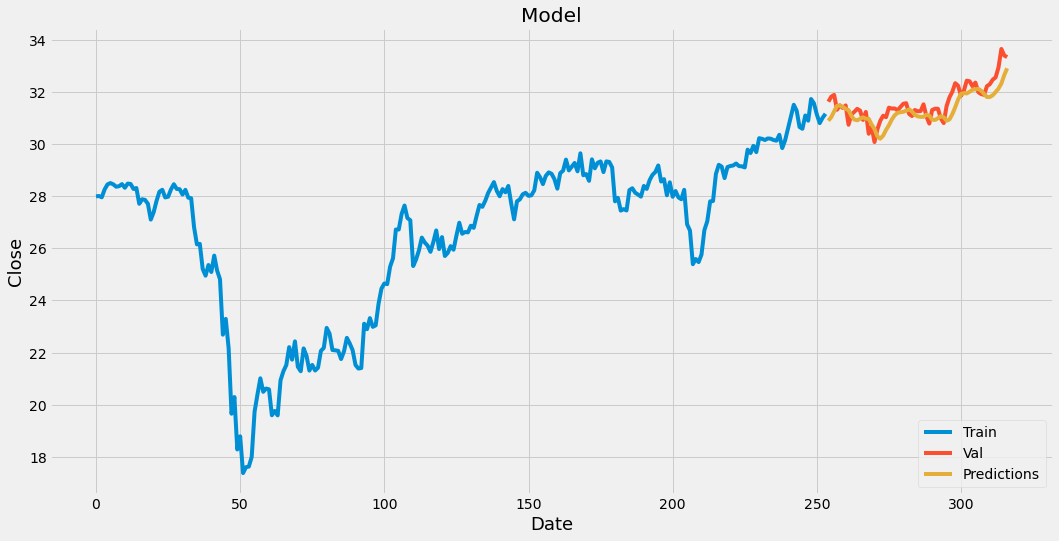

In [371]:
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions
#Veri Görselleştirme
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

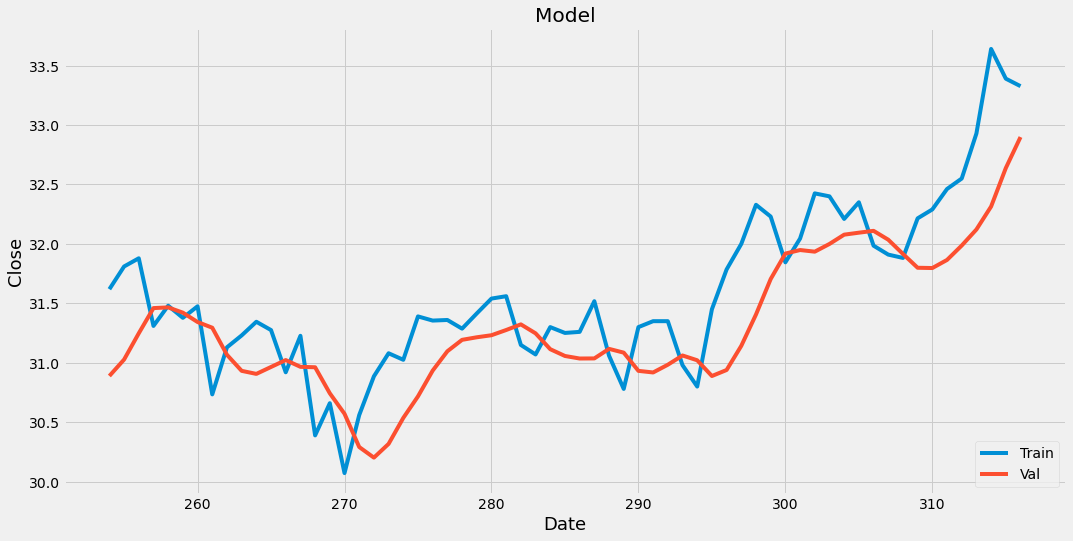

In [372]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close',fontsize=18)
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [373]:
valid

,Close,Predictions
254,31.618999,30.888964
255,31.809999,31.027058
256,31.879000,31.247925
257,31.309999,31.459988
258,31.480000,31.465857
...,...,...
312,32.549999,31.986221
313,32.929001,32.121384
314,33.639999,32.314690
315,33.389999,32.637993


In [374]:
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

<ipython-input-374-b3ae05a8abbd>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [375]:
train["Close"] = scaled_data[:training_data_len,:]

<ipython-input-375-0c98181b4cd9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [376]:
valid["Close"] = scaled_data[training_data_len:]

<ipython-input-376-7f4685467c68>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [377]:
valid['Predictions'] = scaled_predictions

<ipython-input-377-66a2821a783c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



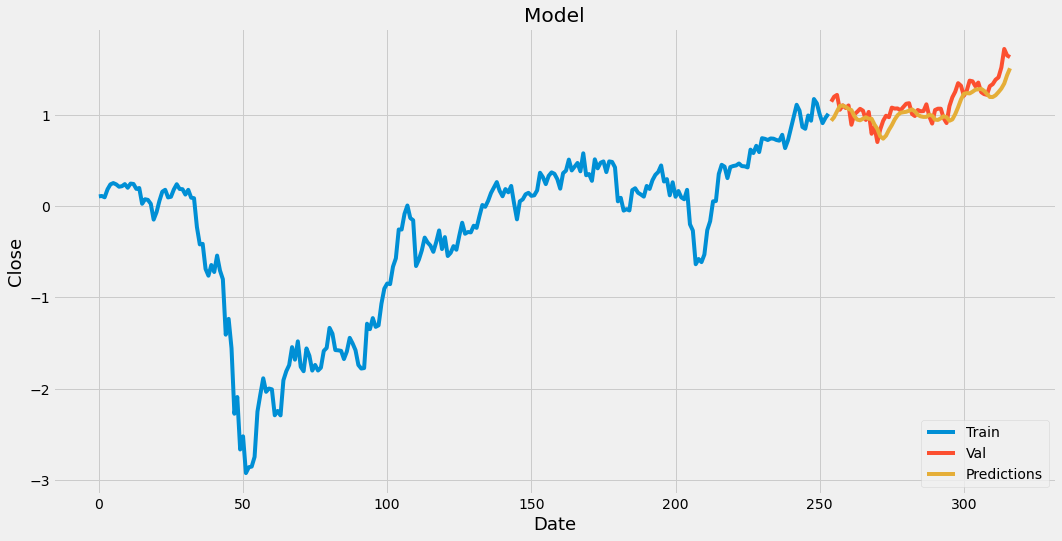

In [378]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

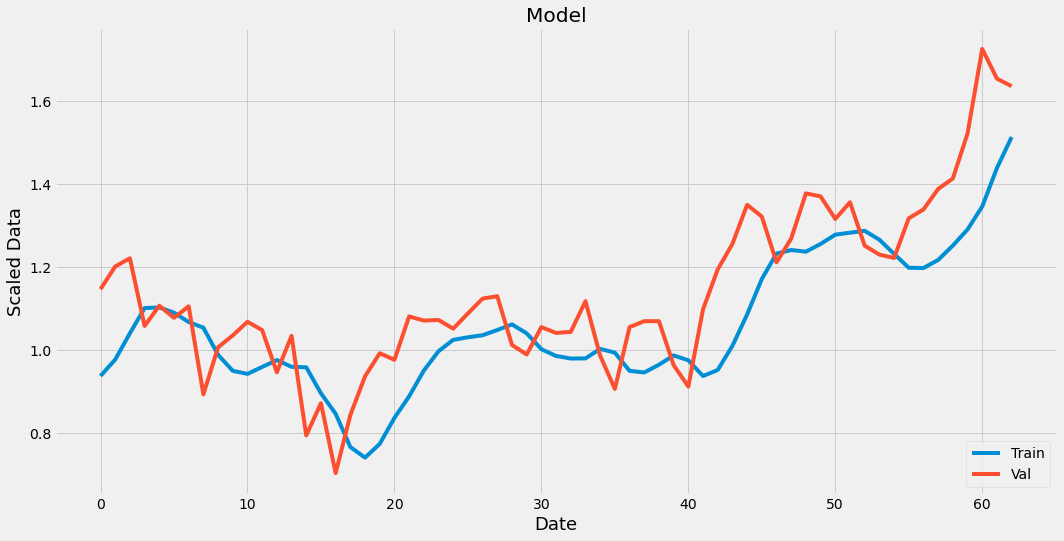

In [379]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Scaled Data',fontsize=18)
plt.plot(scaled_predictions)
plt.plot(scaled_test_data)
plt.legend(['Train','Val'],loc='lower right')
plt.show()